## Modelo de ETP

Se presenta un modelo **Regresión por Mínimos Cuadrados** para *estimar* la ETP de los últimos 15 días basado en:
- Temperatura de los últimos 15 días.
- Radiación de los últimos 15 días.
- Ultra violeta de los últimos 15 días.
- Precipitación de los últimos 15 días.

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# .csv ETP15 Data
df = pd.read_csv("ETP.csv")
df

,TEMP15,RAD15,PREC15,UV15,ETP15
0,17.39375,0.19993,7.1,8.4375,3.95375
1,17.39375,0.19993,7.1,8.4375,3.95375
2,17.39375,0.19993,7.1,8.4375,3.95375
3,17.63750,0.15377,7.6,8.3125,4.17875
4,17.63750,0.15377,7.6,8.3125,4.17875
...,...,...,...,...,...
4365,31.15625,0.26666,34.7,9.7500,8.84188
4366,31.15625,0.26666,34.7,9.7500,8.83625
4367,31.15625,0.26666,34.7,9.7500,8.85063
4368,31.15625,0.26666,34.7,9.7500,8.83875


### Matriz de Correlación

<Axes: title={'center': 'ETP Correlogram'}>

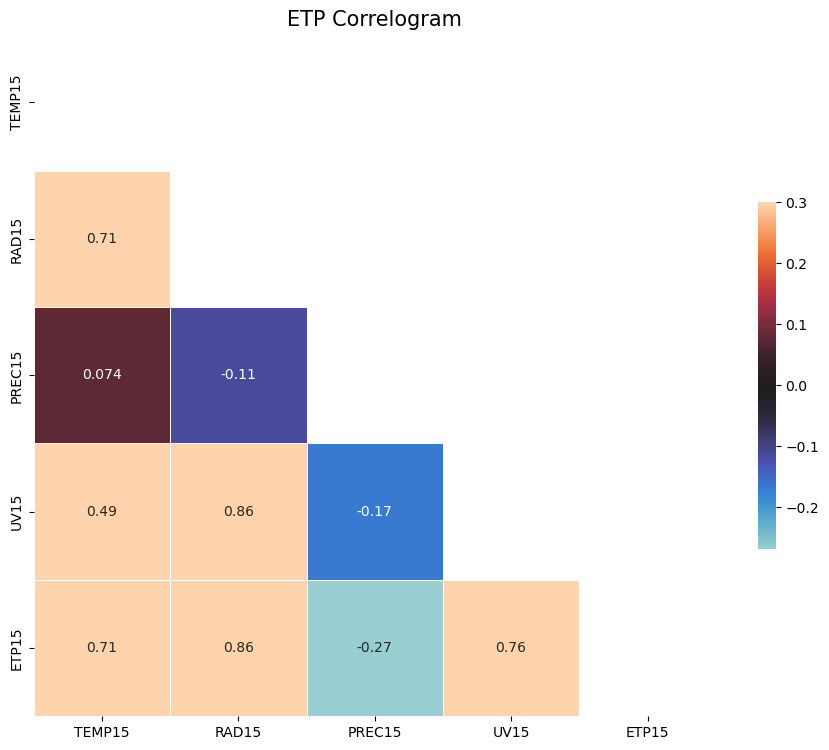

In [3]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
plt.title("ETP Correlogram",size=15)
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

### Correlogramas (Dispersión)

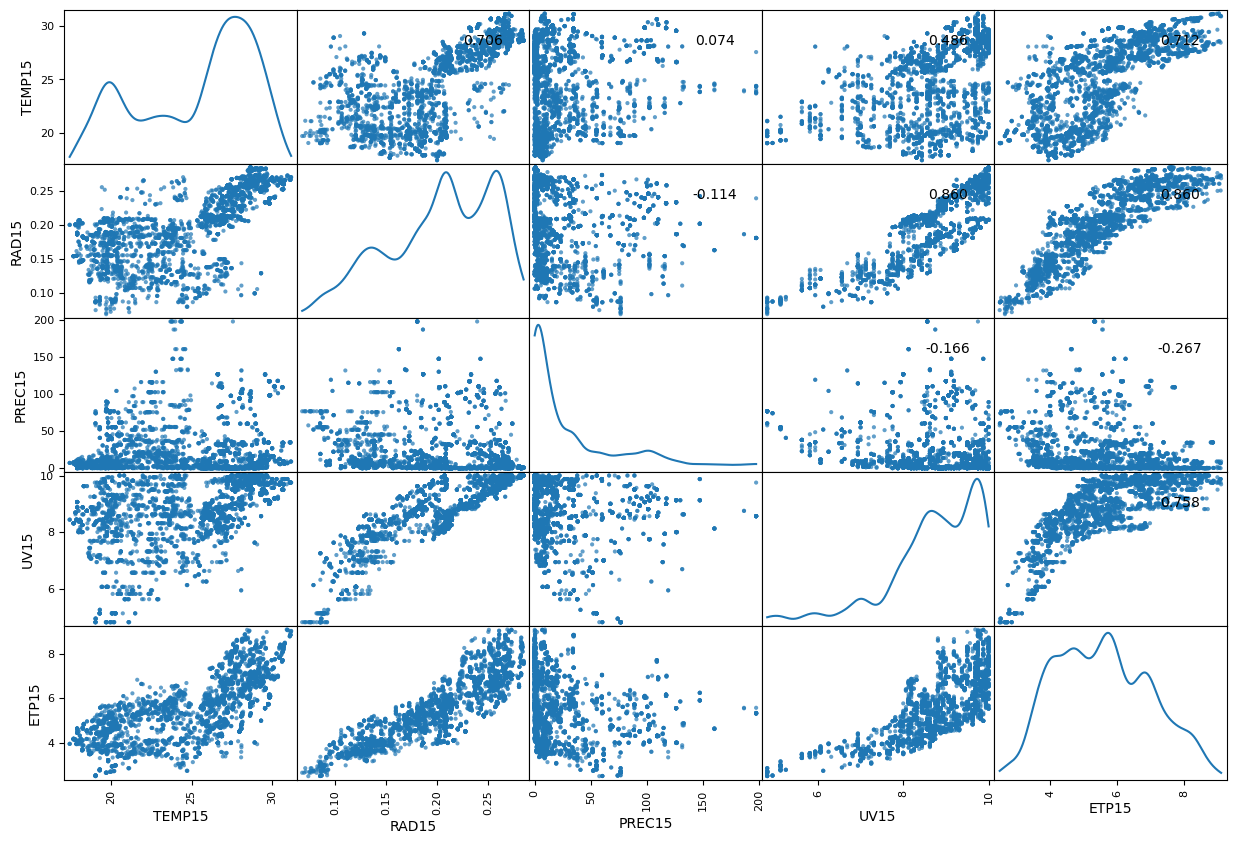

In [4]:
axes = scatter_matrix(df, alpha=0.7,figsize=(15, 10), diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

### Modelo de Regresión Lineal por Mínimos Cuadrados Ordinarios

In [5]:
# Multivariate OLS
OLS_model = smf.ols('ETP15 ~ np.power(UV15,2)' + 
                    '+ UV15' +
                    '+ np.power(TEMP15,2)' + 
                    '+ RAD15' +
                    '+ PREC15' + 
                    '+ TEMP15*RAD15'
                    ,data=df).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ETP15   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2830.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:01:52   Log-Likelihood:                -3960.8
No. Observations:                4370   AIC:                             7938.
Df Residuals:                    4362   BIC:                             7989.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0979      0.599      3.505      0.000       0.924       3.271
np.power(UV15, 2)       0.0429      0.007      6.319      0.000       0.030       0.056
UV15                   -0.3808      0.109     -3.482      0.001      -0.595      -0.166
np.power(TEMP15, 2)    -0.0030      0.001     -2.616      0.009      -0.005      -0.001
RAD15                  -6.0740      2.505     -2.425      0.015     -10.985      -1.163
PREC15                 -0.0082      0.000    -30.611      0.000      -0.009      -0.008
TEMP15                  0.1272      0.044      2.869      0.004       0.040       0.214
TEMP15:RAD15            0.6929      0.098      7.095      0.000       0.501       0.884
==============================================================================
Omnibus:                       89.795   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.427
Skew:                           0.346   Prob(JB):                     1.90e-21
Kurtosis:                       3.214   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
df['UV15_2'] = df['UV15']*df['UV15']
df['TEMP15_2'] = df['TEMP15']*df['TEMP15']
df['TEMP15_RAD15'] = df['TEMP15']*df['RAD15']

# Multivariate OLS
OLS_model = smf.ols("ETP15 ~ UV15_2 + UV15 + TEMP15_2 + RAD15 + PREC15 + TEMP15_RAD15 + TEMP15",data=df).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ETP15   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     2830.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:01:52   Log-Likelihood:                -3960.8
No. Observations:                4370   AIC:                             7938.
Df Residuals:                    4362   BIC:                             7989.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0979      0.599      3.505      0.000       0.924       3.271
UV15_2           0.0429      0.007      6.319      0.000       0.030       0.056
UV15            -0.3808      0.109     -3.482      0.001      -0.595      -0.166
TEMP15_2        -0.0030      0.001     -2.616      0.009      -0.005      -0.001
RAD15           -6.0740      2.505     -2.425      0.015     -10.985      -1.163
PREC15          -0.0082      0.000    -30.611      0.000      -0.009      -0.008
TEMP15_RAD15     0.6929      0.098      7.095      0.000       0.501       0.884
TEMP15           0.1272      0.044      2.869      0.004       0.040       0.214
==============================================================================
Omnibus:                       89.795   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.427
Skew:                           0.346   Prob(JB):                     1.90e-21
Kurtosis:                       3.214   Cond. No.                     1.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Generate Predictions
explanatories = ['UV15_2','UV15','TEMP15_2','RAD15','PREC15','TEMP15_RAD15','TEMP15']
ex_hat = OLS_model.predict(df[explanatories])
df['ETP15_hat'] = ex_hat
df

,TEMP15,RAD15,PREC15,UV15,ETP15,UV15_2,TEMP15_2,TEMP15_RAD15,ETP15_hat
0,17.39375,0.19993,7.1,8.4375,3.95375,71.191406,302.542539,3.477532,4.391892
1,17.39375,0.19993,7.1,8.4375,3.95375,71.191406,302.542539,3.477532,4.391892
2,17.39375,0.19993,7.1,8.4375,3.95375,71.191406,302.542539,3.477532,4.391892
3,17.63750,0.15377,7.6,8.3125,4.17875,69.097656,311.081406,2.712118,4.101357
4,17.63750,0.15377,7.6,8.3125,4.17875,69.097656,311.081406,2.712118,4.101357
...,...,...,...,...,...,...,...,...,...
4365,31.15625,0.26666,34.7,9.7500,8.84188,95.062500,970.711914,8.308126,7.405985
4366,31.15625,0.26666,34.7,9.7500,8.83625,95.062500,970.711914,8.308126,7.405985
4367,31.15625,0.26666,34.7,9.7500,8.85063,95.062500,970.711914,8.308126,7.405985
4368,31.15625,0.26666,34.7,9.7500,8.83875,95.062500,970.711914,8.308126,7.405985


### Predicciones vs. Valores Reales de ETP

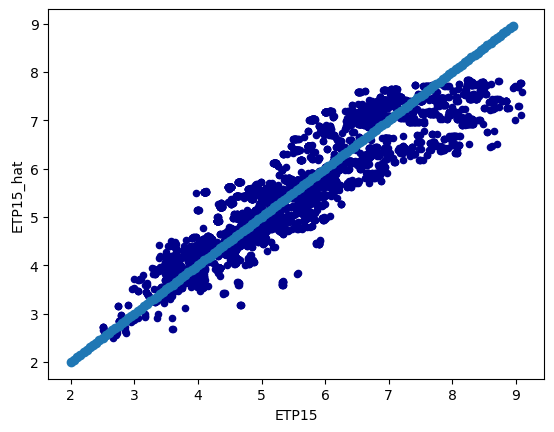

In [8]:
df.plot.scatter(x='ETP15',y='ETP15_hat',c='DarkBlue')
plt.scatter(np.arange(2,9,0.05),np.arange(2,9,0.05))

### Modelo Final

$ETP_{15} = 2.0979 + 0.0429*{UV_{15}}^2 - 0.3808*UV_{15} - 0.0030*{TEMP_{15}}^2 - 6.0740*RAD_{15} - 0.0082*PREC_{15} + 0.6929*TEMP_{15}*RAD_{15} + 0.1272*TEMP_{15}$